# Airbnb Istanbul
This dataset was downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data/) and contains the listed places for rent in Istanbul. The data used in this notebook was collected in December 2022.

### Links:
* [Explore the data](http://insideairbnb.com/istanbul/)
* [Towards Data Science blog post - Data Cleaning and EDA on Airbnb Dataset with Python Pandas and Seaborn](https://towardsdatascience.com/data-cleaning-and-eda-on-airbnb-dataset-with-python-pandas-and-seaborn-7c276116b650)

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import os
import gzip

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data
data_path = "/content/drive/MyDrive/CS210/R4-ExploratoryDataAnalysis/CS 210 - Recitation #3 - Exploratory Data Analysis"
file_name = "listings.csv.gz"
path = os.path.join(data_path, file_name)
df = pd.read_csv(path)

In [ ]:
# Checking dataset size
df.shape

(36717, 75)

In [ ]:
# Checking some rows
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27271,https://www.airbnb.com/rooms/27271,20221230163509,2022-12-31,city scrape,Lovely apartment in perfect location,This is a nicely decorated apartment in an an...,Cihangir is one of Istanbul's cosmopolitan sub...,https://a0.muscache.com/pictures/2f9cfc85-8370...,117026,...,5.0,5.0,5.00,NaN,f,1,1,0,0,0.04
1,28277,https://www.airbnb.com/rooms/28277,20221230163509,2022-12-31,city scrape,Duplex Apartment 11 with Terrace,<b>The space</b><br />The first advantage to s...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,121607,...,5.0,5.0,4.75,NaN,f,19,18,0,0,0.40
2,28318,https://www.airbnb.com/rooms/28318,20221230163509,2022-12-31,city scrape,Cosy home overlooking Bosphorus,<b>The space</b><br />Easy access to both brid...,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,29241,https://www.airbnb.com/rooms/29241,20221230163509,2022-12-31,city scrape,"↪ Istanbul, Your second house",<b>The space</b><br />There are many interesti...,NaN,https://a0.muscache.com/pictures/12385994/b9ba...,125742,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,30697,https://www.airbnb.com/rooms/30697,20221230163509,2022-12-31,previous scrape,nice home in popular area,<b>The space</b><br />I can ensure you that th...,NaN,https://a0.muscache.com/pictures/6392807/b6f01...,132137,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01


In [ ]:
# Checking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36717 entries, 0 to 36716
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36717 non-null  int64  
 1   listing_url                                   36717 non-null  object 
 2   scrape_id                                     36717 non-null  int64  
 3   last_scraped                                  36717 non-null  object 
 4   source                                        36717 non-null  object 
 5   name                                          36694 non-null  object 
 6   description                                   35092 non-null  object 
 7   neighborhood_overview                         14139 non-null  object 
 8   picture_url                                   36717 non-null  object 
 9   host_id                                       36717 non-null 

In [ ]:
# Dropping some columns that we will not be using in this analysis
# Feel free to explore these columns on your own later
cols_to_drop = [
    'scrape_id', 'last_scraped', 'source', 'neighborhood_overview', 'picture_url', 'host_about',
    'host_thumbnail_url', 'host_picture_url', 'amenities', 'minimum_minimum_nights',
    'maximum_minimum_nights', 'minimum_maximum_nights', 'neighbourhood_group_cleansed', 
    'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'has_availability', 'bathrooms',
    'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped', 'host_listings_count', 'host_total_listings_count',
    'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms']

# Drop columns
df = df.drop(columns=cols_to_drop)

In [ ]:
# Checking the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36717 entries, 0 to 36716
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           36717 non-null  int64  
 1   listing_url                  36717 non-null  object 
 2   name                         36694 non-null  object 
 3   description                  35092 non-null  object 
 4   host_id                      36717 non-null  int64  
 5   host_url                     36717 non-null  object 
 6   host_name                    36717 non-null  object 
 7   host_since                   36717 non-null  object 
 8   host_location                21967 non-null  object 
 9   host_response_time           32254 non-null  object 
 10  host_response_rate           32254 non-null  object 
 11  host_acceptance_rate         30913 non-null  object 
 12  host_is_superhost            36717 non-null  object 
 13  host_neighbourho

#### Column descriptions
* `id`
* `listing_url`: Link to the listing on Airbnb site
* `name`: Listing name
* `description`
* `host_id`
* `host_url`
* `host_name`
* `host_since`: Date on which host started hosting on Airbnb
* `host_location`: Location of the host
* `host_response_time`
* `host_response_rate`
* `host_acceptance_rate`
* `host_is_superhost`
* `host_neighbourhood`
* `host_verifications`: Verification methods used by host (email, phone, work email, etc.)
* `host_has_profile_pic`
* `host_identity_verified`
* `neighbourhood`
* `neighbourhood_cleansed`
* `latitude`
* `longitude`
* `property_type`
* `room_type`
* `accommodates`: Number of guests that can stay in the rented place
* `bathrooms_text`
* `bedrooms`
* `beds`
* `price`
* `minimum_nights`
* `maximum_nights`
* `availability_30`: Number of days the place is available in the following 30 days.
* `availability_60`: Number of days the place is available in the following 60 days.
* `availability_90`: Number of days the place is available in the following 90 days.
* `availability_365`: Number of days the place is available in the following 365 days.
* `number_of_reviews`: Total number of reviews received
* `number_of_reviews_ltm`: Number of reviews received in the last 12 months
* `number_of_reviews_l30d`: Number of reviews received in the last 30 days
* `first_review`: Date of first review
* `last_review`: Date of last review
* `review_scores_rating`
* `review_scores_accuracy`
* `review_scores_cleanliness`
* `review_scores_checkin`
* `review_scores_communication`
* `review_scores_location`
* `review_scores_value`
* `license`
* `instant_bookable`
* `reviews_per_month`

## Which neighbourhood has the most Airbnb listings?

In [ ]:
# We have two columns for neighborhood: "neighbourhood" and "neighbourhood_cleansed"
df['neighbourhood_cleansed'].unique()

array(['Beyoglu', 'Sisli', 'Sariyer', 'Fatih', 'Besiktas', 'Kadikoy',
       'Uskudar', 'Kagithane', 'Beykoz', 'Cekmekoy', 'Sancaktepe',
       'Tuzla', 'Maltepe', 'Esenyurt', 'Bahcelievler', 'Beylikduzu',
       'Basaksehir', 'Pendik', 'Bagcilar', 'Kartal', 'Adalar', 'Atasehir',
       'Gaziosmanpasa', 'Bakirkoy', 'Kucukcekmece', 'Zeytinburnu', 'Eyup',
       'Gungoren', 'Umraniye', 'Avcilar', 'Sile', 'Arnavutkoy',
       'Buyukcekmece', 'Bayrampasa', 'Catalca', 'Esenler', 'Silivri',
       'Sultangazi', 'Sultanbeyli'], dtype=object)

In [ ]:
df['neighbourhood_cleansed'].value_counts()

Beyoglu          8297
Sisli            5480
Kadikoy          3916
Fatih            3788
Besiktas         2322
Esenyurt         1450
Uskudar          1205
Kagithane        1028
Atasehir          731
Bagcilar          691
Maltepe           665
Bahcelievler      541
Bakirkoy          477
Umraniye          461
Sariyer           448
Sile              438
Basaksehir        426
Avcilar           410
Pendik            399
Kucukcekmece      392
Kartal            390
Eyup              374
Adalar            346
Beylikduzu        293
Buyukcekmece      234
Zeytinburnu       231
Beykoz            202
Arnavutkoy        187
Tuzla             144
Gaziosmanpasa     117
Cekmekoy          110
Silivri            97
Gungoren           94
Sancaktepe         74
Bayrampasa         73
Esenler            64
Sultangazi         49
Catalca            42
Sultanbeyli        31
Name: neighbourhood_cleansed, dtype: int64

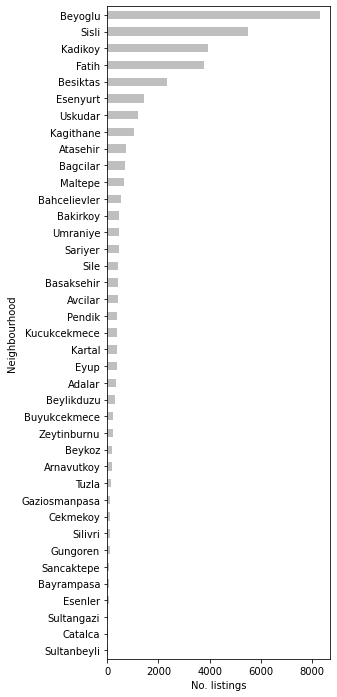

In [ ]:
# Plotting listing count as a bar plot
listing_per_neighbourhood = df['neighbourhood_cleansed'].value_counts()
ax = listing_per_neighbourhood.sort_values().plot.barh(figsize=(4, 12), color='gray', alpha=0.5)
plt.ylabel('Neighbourhood')
plt.xlabel('No. listings')
plt.show()

## Exploring prices

In [ ]:
# Describe price values
df['price'].describe()

count         36717
unique         4205
top       $1,000.00
freq            505
Name: price, dtype: object

In [ ]:
# Convert price to numeric values

# Method 1: Using string methods
df['price'].str.replace('$', '').str.replace(',', '').astype('float')

<ipython-input-25-a57878d9cbcb>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'].str.replace('$', '').str.replace(',', '').astype('float')


0         999.0
1        1778.0
2        2339.0
3         936.0
4        1998.0
          ...  
36712     589.0
36713     800.0
36714    1500.0
36715    9989.0
36716    1850.0
Name: price, Length: 36717, dtype: float64

In [ ]:
# Method 2: Using a custom function
def clean_price(price):
  new_price = price[1:].replace(',', '')
  return new_price

df['price'].apply(clean_price).astype('float')

0         999.0
1        1778.0
2        2339.0
3         936.0
4        1998.0
          ...  
36712     589.0
36713     800.0
36714    1500.0
36715    9989.0
36716    1850.0
Name: price, Length: 36717, dtype: float64

In [ ]:
# Saving converted price
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')

<ipython-input-27-e954aeaa190d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')


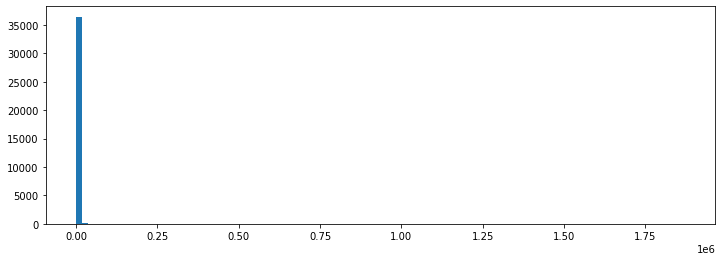

In [ ]:
# Plot price distribution
plt.figure(figsize=(12, 4))

values, bins, bar = plt.hist(df['price'], bins=100)
plt.show()

In [ ]:
# Show spacing between bins
np.diff(bins)

array([18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711.78,
       18711.78, 18711.78, 18711.78, 18711.78, 18711.78, 18711

Notice that most of the prices fall in the first bin. This is because, in general, most places would have cheap rents, with some exceptions having very expensive rents. The same case occurs when plotting the monthly income of a population. Most people earn salaries in a range of say (8,500-50,000), while a small proportion of the population would earn 1,000,000+. You will get to know these distributions more later when learning about statistical analysis and distributions.

By default, the histogram function creates equally sized bins between the minimum and maximum values of `price`. For highly skewed distributions, this results in most values falling in the first bins. To avoid this, we can use log bins.

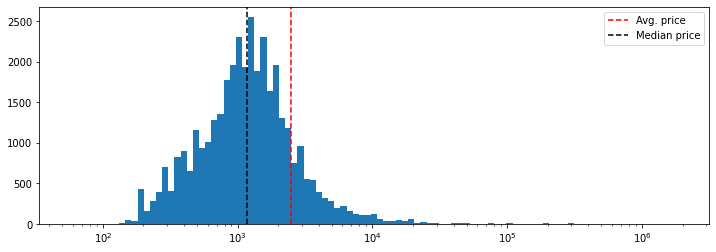

In [ ]:
# Plot price distribution using log scale
plt.figure(figsize=(12, 4))

bins = np.logspace(np.log10(df['price'].min()), np.log10(df['price'].max()), 100)
plt.hist(df['price'], bins=bins)
plt.xscale('log')

# Adding a line for median and mean prices
plt.axvline(x=df['price'].mean(), linestyle='--', color='red', label='Avg. price')
plt.axvline(x=df['price'].median(), linestyle='--', color='black', label='Median price')
plt.legend()
plt.show()

In [ ]:
# Show the log bin spacing
np.diff(bins)

array([6.31309989e+00, 7.01231446e+00, 7.78897133e+00, 8.65164771e+00,
       9.60987080e+00, 1.06742230e+01, 1.18564587e+01, 1.31696343e+01,
       1.46282521e+01, 1.62484208e+01, 1.80480332e+01, 2.00469637e+01,
       2.22672879e+01, 2.47335268e+01, 2.74729167e+01, 3.05157108e+01,
       3.38955131e+01, 3.76496493e+01, 4.18195790e+01, 4.64513541e+01,
       5.15961267e+01, 5.73107145e+01, 6.36582279e+01, 7.07087674e+01,
       7.85401974e+01, 8.72390064e+01, 9.69012619e+01, 1.07633671e+02,
       1.19554761e+02, 1.32796185e+02, 1.47504178e+02, 1.63841171e+02,
       1.81987586e+02, 2.02143828e+02, 2.24532498e+02, 2.49400851e+02,
       2.77023526e+02, 3.07705582e+02, 3.41785864e+02, 3.79640746e+02,
       4.21688289e+02, 4.68392856e+02, 5.20270240e+02, 5.77893363e+02,
       6.41898600e+02, 7.12992810e+02, 7.91961140e+02, 8.79675698e+02,
       9.77105181e+02, 1.08532558e+03, 1.20553205e+03, 1.33905212e+03,
       1.48736036e+03, 1.65209466e+03, 1.83507428e+03, 2.03832002e+03,
      

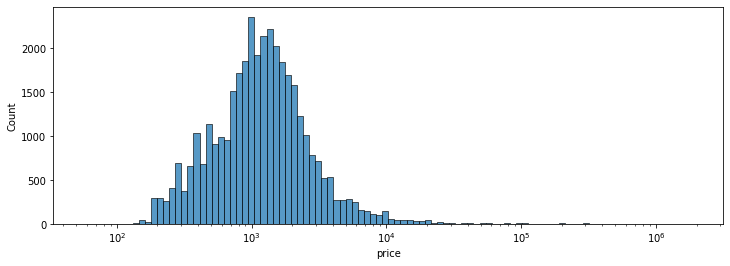

In [ ]:
# Plot price distribution using log scale - Seaborn
plt.figure(figsize=(12, 4))

sns.histplot(df['price'], bins=100, log_scale=True)

plt.show()

## Exploring prices in different neighbourhoods
One would expect certain neighbourhoods, like ones with touristic places, to have relatively higher prices than other neighbourhoods. Let us now explore the prices in each neighbourhood.

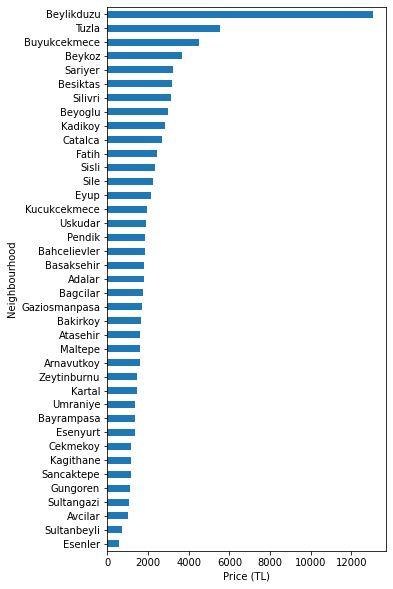

In [ ]:
# Plot the average price for each neighbourhood
neighborhood_avg_prices = df.groupby('neighbourhood_cleansed')['price'].mean()

ax = neighborhood_avg_prices.sort_values().plot.barh(figsize=(5, 10))
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Price (TL)')
plt.show()

Anyone familiar with Istanbul neighbourhoods would be surprised to see Beylikduzu at the top of the list of highest Airbnb rental prices since it is far from the center of Istanbul and does not have any touristic places. 

In [ ]:
# Investigate why Beylikduzu has very high prices
cond = df['neighbourhood_cleansed'] == 'Beylikduzu'
df.loc[cond, ['listing_url', 'price']].sort_values(by='price', ascending=False).head()

,listing_url,price
21644,https://www.airbnb.com/rooms/652709740242984520,1871235.0
25328,https://www.airbnb.com/rooms/697075774701452811,1480146.0
11789,https://www.airbnb.com/rooms/50319894,21519.0
8356,https://www.airbnb.com/rooms/44153421,18712.0
25793,https://www.airbnb.com/rooms/702726733577549627,9356.0


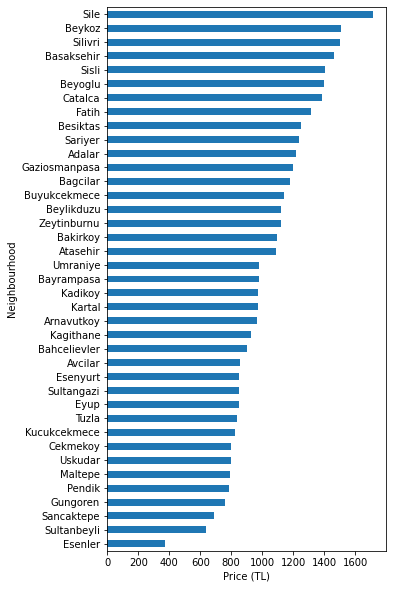

In [ ]:
# Replot prices by neighbourhood but using median this time
neighborhood_median_prices = df.groupby('neighbourhood_cleansed')['price'].median()

ax = neighborhood_median_prices.sort_values().plot.barh(figsize=(5, 10))
ax.set_ylabel('Neighbourhood')
ax.set_xlabel('Price (TL)')
plt.show()

In [ ]:
# Dropping prices higher than 50,000
size_before_drop = df.shape[0]
cond = df['price'] < 50000
df = df.loc[cond].reset_index(drop=True)
size_after_drop = df.shape[0]

print(f'Number of dropped listings: {size_before_drop - size_after_drop}')

Number of dropped listings: 102


It is always better to plot the distribution of data instead of relying on summary statistics, such as mean and median), One method to do so is using box plots. The following image summarizes what a box plot represents (Image source: [Byjus.com](https://byjus.com/maths/box-plot/)).

![](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)

![](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/screenshot-45-1617945953.png)

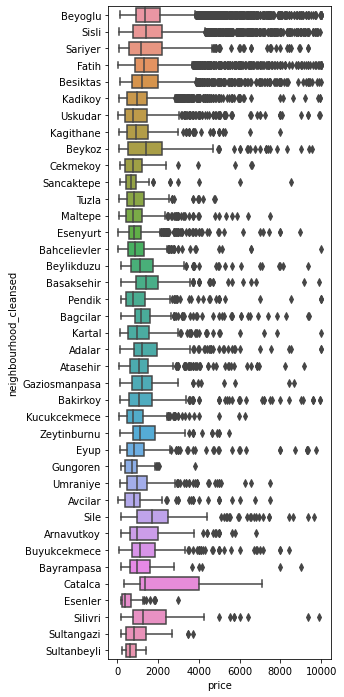

In [ ]:
# Plotting price distribution per neighbourhood using seaborn boxplots
plt.figure(figsize=(4, 12))

# Excluding some highly priced rentals for better visibility
cond = df['price'] < 10000
sns.boxplot(y='neighbourhood_cleansed', x='price', data=df.loc[cond])

plt.show()

## Exploring the relationship between profile attributes and listing reviews and prices
The dataset we have has some details about the host profile, such as `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`. Let us explore if there is a relationship between these attributes and the listing prices or the guest reviews.

First, we need to check the values that are in these columns:

In [ ]:
# Categorical columns
cat_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']

# Checking the values of these columns
for col in cat_cols:
  print(col)
  display(df[col].value_counts())
  print()

host_is_superhost


f    30810
t     5805
Name: host_is_superhost, dtype: int64


host_has_profile_pic


t    34298
f     2317
Name: host_has_profile_pic, dtype: int64


host_identity_verified


t    29942
f     6673
Name: host_identity_verified, dtype: int64


instant_bookable


f    20991
t    15624
Name: instant_bookable, dtype: int64

In [ ]:
# Checking average review score for superhosts and normal hosts
df.groupby('host_is_superhost')['review_scores_rating'].mean()

host_is_superhost
f    4.506978
t    4.841026
Name: review_scores_rating, dtype: float64

In [ ]:
# Including count too in the summary
df.groupby('host_is_superhost')['review_scores_rating'].agg(['mean', 'count'])

,mean,count
host_is_superhost,,
f,4.506978,16485
t,4.841026,5146


Remember that **correlation does not mean causation!** One may assume, based on the previous observation, that hosts that have the "Superhost" label tend to get higher reviews. However, it may be that Airbnb gives the "Superhost" label to hosts who have already got higher reviews. In fact, this is the case as described on Airbnb site:

"*The Superhost program celebrates and rewards Airbnb’s top-rated and most experienced hosts.*" [link](https://www.airbnb.com/d/superhost)

A data scientist must be critical when making conclusions from the data. A question worth asking regarding the "Superhost" label is:

* Does the number of reservations from a certain host increase after receiving the "Superhost" label?

Unfortunately, the data in our hands is not enough to answer this question. What data do you think we need to collect to address this question? You will be addressing similar questions in the hypothesis testing lectures. 

In [ ]:
df.groupby('host_is_superhost')['price'].median()

host_is_superhost
f    1123.0
t    1345.0
Name: price, dtype: float64

## Exploring prices of different room types

In [ ]:
# Check the available room types in "room_type"
df['room_type'].value_counts()

Entire home/apt    24094
Private room       11520
Shared room          565
Hotel room           436
Name: room_type, dtype: int64

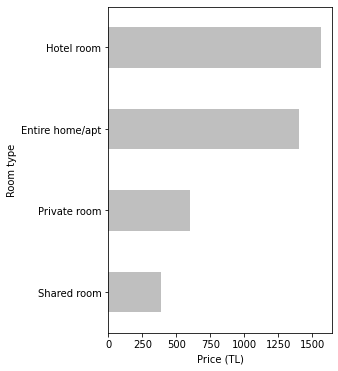

In [ ]:
price_by_room_type = df.groupby('room_type')['price'].median()
price_by_room_type.sort_values().plot.barh(figsize=(4, 6), color='gray', alpha=0.5)
plt.xlabel('Price (TL)')
plt.ylabel('Room type')

plt.show()

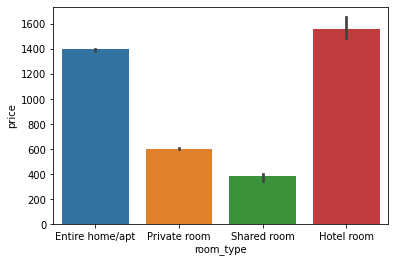

In [ ]:
sns.barplot(x='room_type', y='price', estimator='median', data=df)
plt.show()

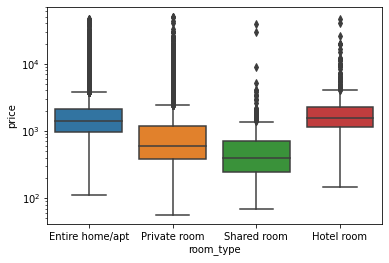

In [ ]:
# Plotting price distributions by room type
sns.boxplot(x='room_type', y='price', data=df)
plt.yscale('log')
plt.show()

## What are the prices of hotel rooms in Beyoglu?

In [ ]:
# Find median price of hotel rooms in Beyoglu
cond = (df['room_type'] == 'Hotel room') & (df['neighbourhood_cleansed'] == 'Beyoglu')
print(f"Median price: {df.loc[cond, 'price'].median()}")

Median price: 1775.0


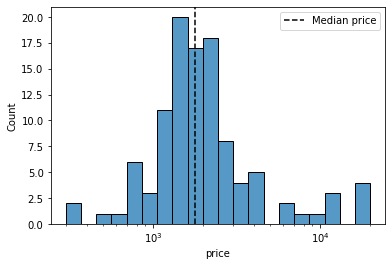

In [ ]:
# Plotting the distribution of prices in Beyoglu
cond = (df['room_type'] == 'Hotel room') & (df['neighbourhood_cleansed'] == 'Beyoglu')
ax = sns.histplot(df.loc[cond, 'price'], bins=20, log_scale=True)
ax.axvline(x=df.loc[cond, 'price'].median(), color='black', linestyle='--', label='Median price')
ax.legend()
plt.show()

## Exploring the relationship between host account age and reviews
In this part we will explore the relationship between the account age of a host and the prices they ask for. We will look at listings in Beyoglu

In [ ]:
# Checking the creation dates of host accounts "host_since"
df['host_since'].head()

0    2010-05-02
1    2010-05-10
2    2010-05-10
3    2010-05-16
4    2010-05-25
Name: host_since, dtype: object

In [ ]:
# Converting to datetime
df['host_since'] = pd.to_datetime(df['host_since'])

In [ ]:
# Creating account age column
df['account_age'] = pd.Timestamp('2023-03-20') - df['host_since']

In [ ]:
# Converting account age to numeric (number of days)
df['account_age'] = df['account_age'].dt.days

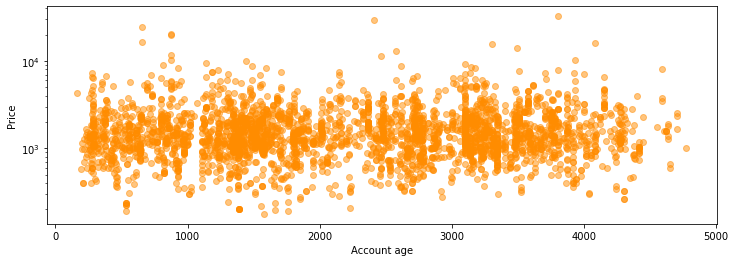

In [ ]:
# Plotting account age and price
cond = (df['neighbourhood_cleansed'] == 'Beyoglu') & (df['number_of_reviews'] > 10)
plt.figure(figsize=(12, 4))
plt.scatter('account_age', 'price', data=df.loc[cond], alpha=0.5, color='darkorange')
plt.xlabel('Account age')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

In [ ]:
# Checking correlation
df[['account_age', 'price']].corr()

,account_age,price
account_age,1.000000,0.030803
price,0.030803,1.000000


## Exploring data on map

In [ ]:
import folium

In [ ]:
# Plot Istanbul map
m = folium.Map(location=[41, 29], zoom_start=11)
m

In [ ]:
# Adding Airbnb listings to the map

# First, let us include only the listings with more than n reviews
cond = df['number_of_reviews'] > 10

m = folium.Map(location=[41.0082, 28.9784])

for idx, row in df.loc[cond].iterrows():
  lat = row['latitude']
  long = row['longitude']

  if row['instant_bookable'] == 't':
    color = 'green'
  else:
    color = 'red'

  tooltip = f"<b>Neighbourhood:</b> {row['neighbourhood_cleansed']}<br><b>Price:</b> {row['price']} (TL)<br><b>"
  folium.Circle(
      radius=15,  # in meters
      location=[lat, long],
      color=color,
      fill_opacity=0.5,
      opacity=0.8,
      fill=True,
      tooltip=tooltip,
  ).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import branca
import branca.colormap as cm

# First, let us include only the listings with more than 20 reviews
cond = df['number_of_reviews'] > 20
min_price = np.log10(df.loc[cond, 'price']).min()
max_price = np.log10(df.loc[cond, 'price']).max()

m = folium.Map(location=[41.0082, 28.9784])

colormap = cm.LinearColormap(colors=['yellow','red'], index=[min_price, max_price],vmin=min_price,vmax=max_price)

for idx, row in df.loc[cond].iterrows():
  lat = row['latitude']
  long = row['longitude']

  tooltip = f"<b>Neighbourhood:</b> {row['neighbourhood_cleansed']}<br><b>Price:</b> {row['price']}<br><b>"
  folium.Circle(
      radius=25,  # in meters
      location=[lat, long],
      color=colormap(np.log10(row['price'])),
      opacity=0.8,
      fill_opacity=0.5,
      fill=True,
      tooltip=tooltip,
  ).add_to(m)

m.add_child(colormap)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from folium.plugins import HeatMap

cond = df['number_of_reviews'] > 20

m = folium.Map(location=[41.0082, 28.9784])

locs = df[["latitude", "longitude"]].values
# feed it to heatmap function
HeatMap(locs, radius=15).add_to(m)

m